# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus componentes principales, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [11]:
df = pd.read_csv('data/nndb_flat.csv')
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [13]:
df.describe()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,15467.757368,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,9221.428766,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8695.250000,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,14273.000000,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,20050.750000,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,93600.000000,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

/var/folders/h9/j_cmbmlx2zx84w6mpd7n0r_00000gn/T/ipykernel_51054/1440233856.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


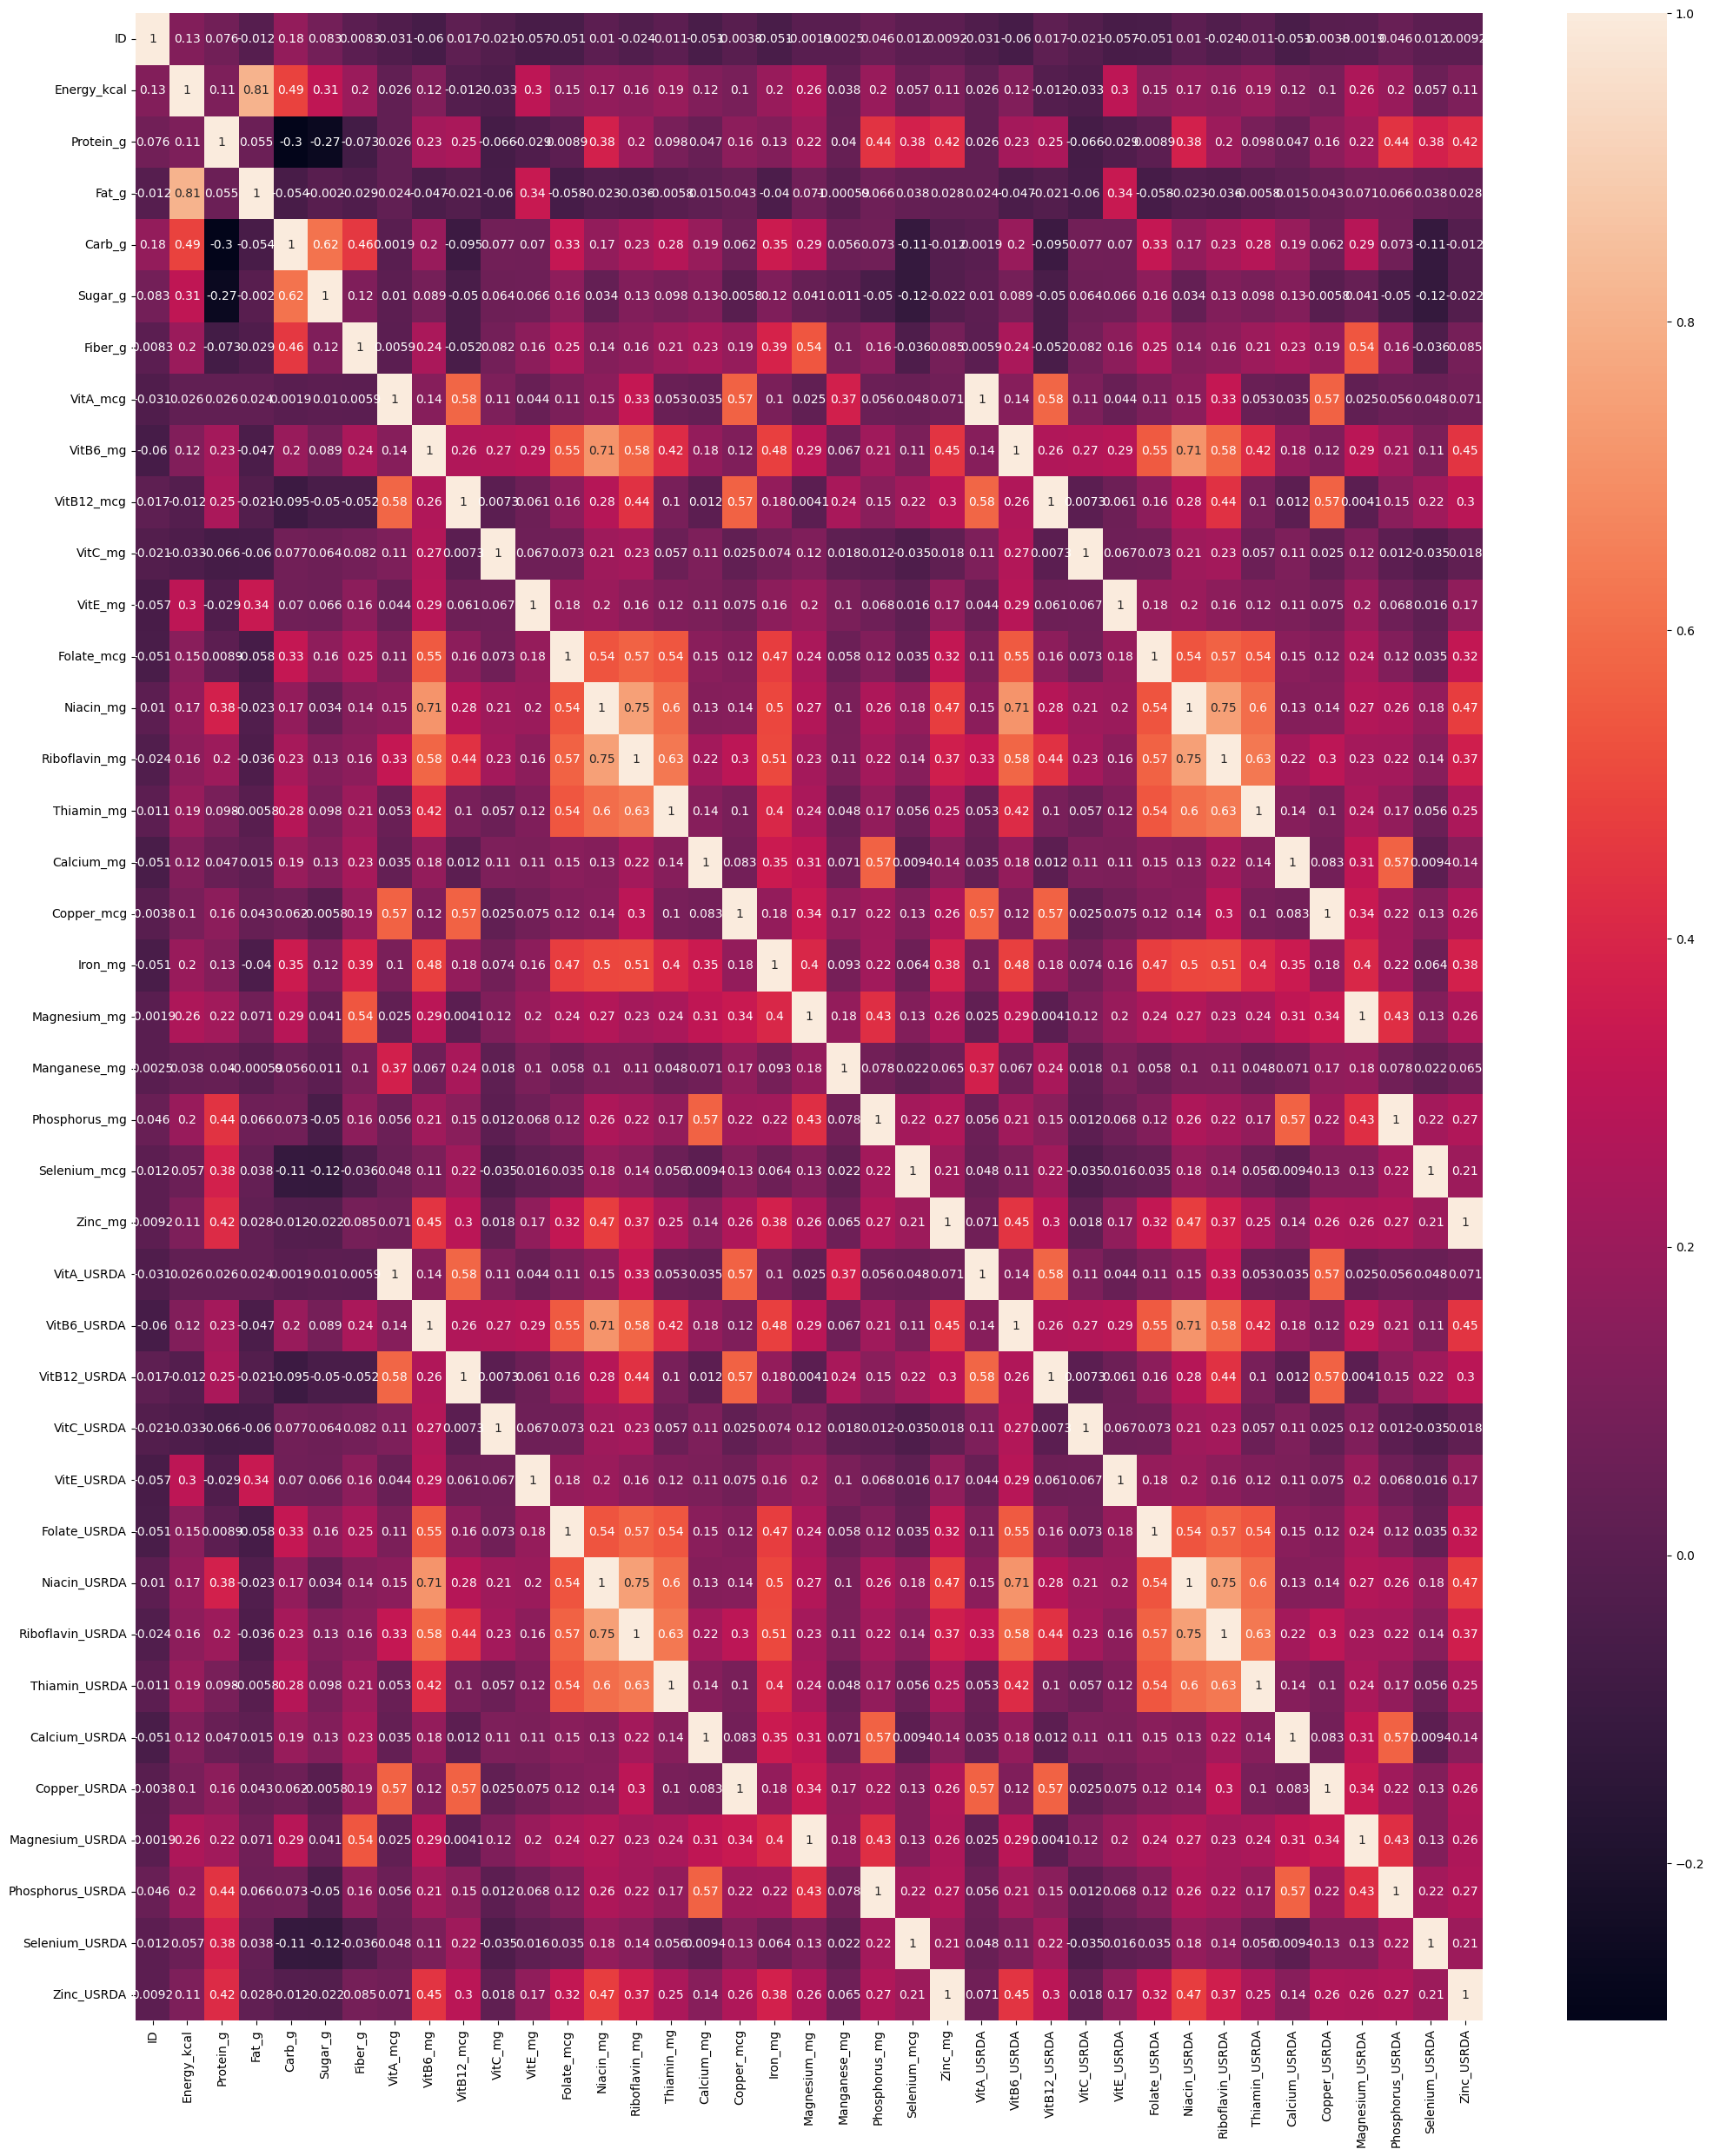

In [14]:
plt.figure(figsize=(25,30))
sns.heatmap(df.corr(), annot=True);

In [20]:
columnas = df.columns

In [21]:
df.drop(columns=columnas[columnas.str.contains('USRDA')].values, inplace=True)

### Variables no numéricas
Elimina las variables de texto del dataset

In [22]:
df.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg'],
      dtype='object')

In [23]:
df = df.iloc[:,7:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energy_kcal    8618 non-null   float64
 1   Protein_g      8618 non-null   float64
 2   Fat_g          8618 non-null   float64
 3   Carb_g         8618 non-null   float64
 4   Sugar_g        8618 non-null   float64
 5   Fiber_g        8618 non-null   float64
 6   VitA_mcg       8618 non-null   float64
 7   VitB6_mg       8618 non-null   float64
 8   VitB12_mcg     8618 non-null   float64
 9   VitC_mg        8618 non-null   float64
 10  VitE_mg        8618 non-null   float64
 11  Folate_mcg     8618 non-null   float64
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   float64
 16  Copper_mcg     8618 non-null   float64
 17  Iron_mg        8618 non-null   float64
 18  Magnesiu

### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables
Most of the variables are "zero" inflated and skewed right. We may want to consider transformation so "improve" the distributions and hopefully produce better correlations for our PCA. Note: this is an optional step that may not always improve results.

Podemos realizar una transformación Logarítmica

Nota: Como tenemos muchos ceros en nuestro df, podemos sumarle 1 para evitar este problema (indeterminación, infinito).

(df = df + 1)

In [24]:
df = df + 1

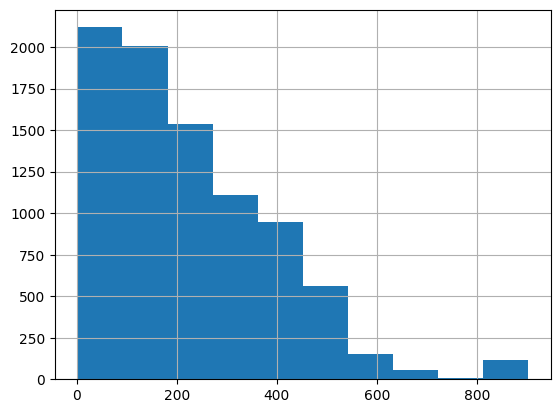

In [25]:
df['Energy_kcal'].hist();

In [26]:
df = df.apply(np.log1p)

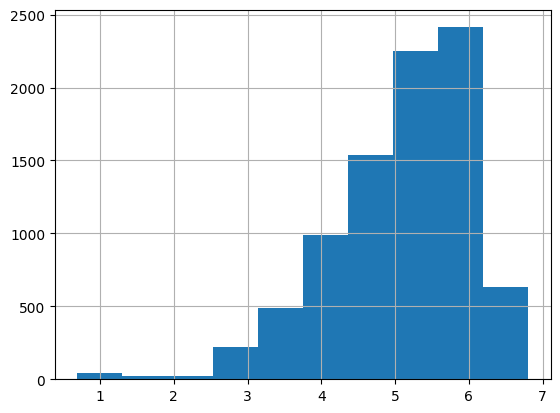

In [27]:
df['Energy_kcal'].hist();

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [28]:
scaler = StandardScaler()
df_escalado = scaler.fit_transform(df)
df_escalado

array([[ 1.570644  , -1.36241684,  2.43950866, ..., -0.70084236,
        -0.76703322, -0.94529652],
       [ 1.570644  , -1.36241684,  2.43950866, ..., -0.72615188,
        -0.76703322, -0.98325716],
       [ 1.78130178, -1.61391194,  2.64299517, ..., -1.76473849,
        -1.1118116 , -1.02196583],
       ...,
       [ 0.54180043, -1.76158802, -1.35823983, ..., -1.31744358,
        -0.85662423, -0.85348534],
       [-0.59732263,  0.72104947, -0.81754141, ...,  0.81888339,
         1.17374066, -0.23526702],
       [-0.60884648,  0.93067952, -1.1308615 , ...,  0.55487319,
         0.79352682, -0.23526702]])

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [29]:
df_escalado.shape

(8618, 23)

In [30]:
pca = PCA(n_components=23)
X_pca = pca.fit_transform(df_escalado)
X_pca

array([[-2.06503384, -0.73215792, -1.59862303, ...,  0.03679395,
        -0.14353557, -0.9201028 ],
       [-2.04529951, -0.69060903, -1.60672319, ...,  0.08014983,
        -0.1340733 , -0.92359997],
       [-2.98865599, -0.83520298, -1.889836  , ..., -0.0907917 ,
         0.11787865, -0.85471615],
       ...,
       [-2.72154907,  1.94219299, -1.0436975 , ...,  0.37297695,
         0.62918853, -0.58280006],
       [ 0.98825402, -0.87879778,  0.40094541, ...,  0.80721478,
         1.08413985,  0.2128619 ],
       [ 0.16067422, -1.24052532,  1.19947008, ...,  0.60065189,
         0.27989881, -0.42951738]])

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [31]:
pca.explained_variance_ratio_

array([0.30217148, 0.16344972, 0.08654397, 0.07231098, 0.05851567,
       0.04620102, 0.03367778, 0.02811087, 0.02575049, 0.02295586,
       0.02164985, 0.02090641, 0.01987318, 0.0146216 , 0.01402859,
       0.01349594, 0.01201248, 0.01012591, 0.0095618 , 0.00762387,
       0.00730357, 0.00583088, 0.00327807])

In [32]:
pca.explained_variance_ratio_.cumsum()

array([0.30217148, 0.4656212 , 0.55216517, 0.62447614, 0.68299182,
       0.72919284, 0.76287062, 0.79098149, 0.81673198, 0.83968784,
       0.86133769, 0.88224411, 0.90211728, 0.91673889, 0.93076748,
       0.94426342, 0.9562759 , 0.96640181, 0.97596361, 0.98358748,
       0.99089105, 0.99672193, 1.        ])

In [33]:
index = np.arange(1, 24)
values = pca.explained_variance_ratio_.cumsum()
series = pd.Series(values, index=index)
print(series)


1     0.302171
2     0.465621
3     0.552165
4     0.624476
5     0.682992
6     0.729193
7     0.762871
8     0.790981
9     0.816732
10    0.839688
11    0.861338
12    0.882244
13    0.902117
14    0.916739
15    0.930767
16    0.944263
17    0.956276
18    0.966402
19    0.975964
20    0.983587
21    0.990891
22    0.996722
23    1.000000
dtype: float64


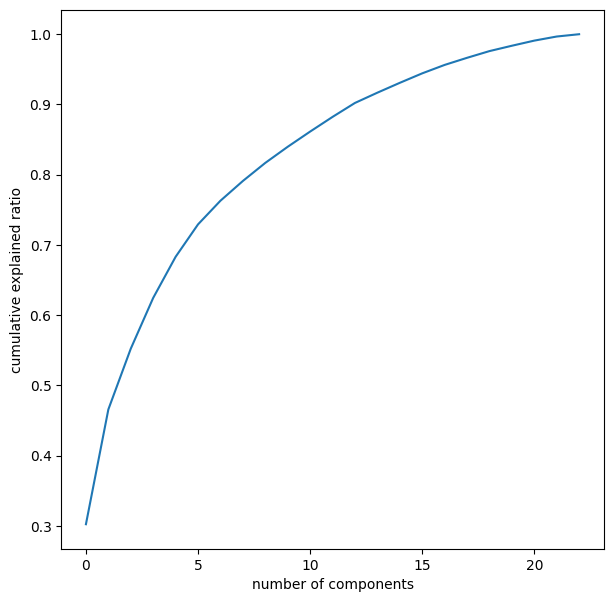

In [35]:
plt.figure(figsize=(7,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained ratio');


## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [ ]:
df_escalado.shape

(8618, 23)

In [ ]:
pca_6 = PCA(n_components=6)
X_pca_6 = pca_6.fit_transform(df_escalado)
X_pca_6.shape

(8618, 6)

In [ ]:
result = pd.DataFrame(X_pca_6, columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])
result.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.065033,-0.732127,-1.598781,1.012037,-3.936460,0.128283
1,-2.045299,-0.690584,-1.606867,1.007171,-3.917595,0.161919
2,-2.988655,-0.835174,-1.890006,1.958873,-3.953263,1.073746
3,1.419415,-1.252744,-0.316486,-0.956787,-2.481594,-2.159336
4,1.195215,-1.217346,-0.491074,-1.155098,-2.734478,-2.372856


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [ ]:
df_final = pd.read_csv('data/nndb_flat.csv')
df_final

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [ ]:
result['FoodGroup'] = df_final['FoodGroup']
result

,PC1,PC2,PC3,PC4,PC5,PC6,FoodGroup
0,-2.065033,-0.732127,-1.598781,1.012037,-3.936460,0.128283,Dairy and Egg Products
1,-2.045299,-0.690584,-1.606867,1.007171,-3.917595,0.161919,Dairy and Egg Products
2,-2.988655,-0.835174,-1.890006,1.958873,-3.953263,1.073746,Dairy and Egg Products
3,1.419415,-1.252744,-0.316486,-0.956787,-2.481594,-2.159336,Dairy and Egg Products
4,1.195215,-1.217346,-0.491074,-1.155098,-2.734478,-2.372856,Dairy and Egg Products
...,...,...,...,...,...,...,...
8613,2.459990,-2.627096,0.286629,-0.037699,-2.663846,-0.183572,Finfish and Shellfish Products
8614,-0.010781,-1.844139,0.591812,-1.480882,0.400089,-0.634712,Finfish and Shellfish Products
8615,-2.721552,1.942128,-1.043562,1.459692,1.070406,-0.774378,Sweets
8616,0.988252,-0.878869,0.401146,-1.635251,-1.589762,0.919270,Finfish and Shellfish Products


In [ ]:
result.groupby('FoodGroup').mean().sort_values(by=['PC1'], ascending=False)

,PC1,PC2,PC3,PC4,PC5,PC6
FoodGroup,,,,,,
Breakfast Cereals,4.325773,2.784633,0.763811,1.970867,1.044864,-0.174287
Nut and Seed Products,3.165472,1.908150,-1.698891,-1.822900,-0.320129,1.824660
Spices and Herbs,2.845743,3.621507,0.028119,-1.881091,0.031608,1.627080
Snacks,1.908694,1.847164,-1.239737,-0.285042,-0.388921,0.309648
Beef Products,1.475234,-2.756886,0.156290,0.078414,0.191837,0.295307
"Lamb, Veal, and Game Products",1.293933,-2.509941,0.173507,0.060562,0.195247,0.307064
Poultry Products,1.226867,-2.188839,0.429148,-0.097377,-0.246411,-0.225132
Pork Products,1.144173,-2.270505,-0.028382,0.329446,0.460271,-0.064278
Finfish and Shellfish Products,0.994572,-1.909728,1.009350,-0.882869,-0.739134,-0.294482
